In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR7cOF5NSArcxNxYjzDjjTnFNmG-l0zM8WqabuCqNmwKke7VTEMKjR1BamqigAFeRCvbhCylaspQpTG/pub?gid=0&single=true&output=csv'
approval = pd.read_csv(url)
approval

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,sponsor,mode,tracking,wording_notes,partisan,other_notes
0,economy,Ipsos,03/31/2025,04/02/2025,1486,A,37.0,52.0,-15.0,https://www.ipsos.com/sites/default/files/ct/n...,Reuters,Probability Panel,False,NaN,NaN,NaN
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,CBS News,Online Matched Sample,False,NaN,NaN,NaN
3,economy,Harris Insights & Analytics,03/26/2025,03/27/2025,2746,RV,45.0,55.0,-10.0,https://harvardharrispoll.com/wp-content/uploa...,Harvard CAPS,Online Opt-In Panel,False,NaN,NaN,NaN
4,economy,J.L. Partners,03/25/2025,03/27/2025,1001,RV,45.0,55.0,-10.0,https://www.dailymail.co.uk/news/article-14547...,Daily Mail,Online Opt-In Panel,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,economy,Morning Consult,11/26/2025,11/30/2025,2200,RV,45.0,47.0,-2.0,https://pro.morningconsult.com/trackers/donald...,NaN,Online Opt-In Panel,False,NaN,NaN,NaN
1479,trade_tariffs,Morning Consult,11/26/2025,11/30/2025,2200,RV,46.0,45.0,1.0,https://pro.morningconsult.com/trackers/donald...,NaN,Online Opt-In Panel,False,NaN,NaN,NaN
1480,inflation,YouGov,11/28/2025,12/01/2025,1628,A,32.0,59.0,-27.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,Affordability,NaN,NaN
1481,civil_rights,YouGov,11/28/2025,12/01/2025,1628,A,36.0,51.0,-15.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN


In [4]:
approval.to_csv('president-issue-approval-polling.csv')

In [5]:
approval[approval['issue']=='economy'].shape

(240, 16)

In [6]:
approval['sponsor'] = approval['sponsor'].fillna('na')

In [7]:
approval

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,sponsor,mode,tracking,wording_notes,partisan,other_notes
0,economy,Ipsos,03/31/2025,04/02/2025,1486,A,37.0,52.0,-15.0,https://www.ipsos.com/sites/default/files/ct/n...,Reuters,Probability Panel,False,NaN,NaN,NaN
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,CBS News,Online Matched Sample,False,NaN,NaN,NaN
3,economy,Harris Insights & Analytics,03/26/2025,03/27/2025,2746,RV,45.0,55.0,-10.0,https://harvardharrispoll.com/wp-content/uploa...,Harvard CAPS,Online Opt-In Panel,False,NaN,NaN,NaN
4,economy,J.L. Partners,03/25/2025,03/27/2025,1001,RV,45.0,55.0,-10.0,https://www.dailymail.co.uk/news/article-14547...,Daily Mail,Online Opt-In Panel,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,economy,Morning Consult,11/26/2025,11/30/2025,2200,RV,45.0,47.0,-2.0,https://pro.morningconsult.com/trackers/donald...,na,Online Opt-In Panel,False,NaN,NaN,NaN
1479,trade_tariffs,Morning Consult,11/26/2025,11/30/2025,2200,RV,46.0,45.0,1.0,https://pro.morningconsult.com/trackers/donald...,na,Online Opt-In Panel,False,NaN,NaN,NaN
1480,inflation,YouGov,11/28/2025,12/01/2025,1628,A,32.0,59.0,-27.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,Affordability,NaN,NaN
1481,civil_rights,YouGov,11/28/2025,12/01/2025,1628,A,36.0,51.0,-15.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN


In [8]:
ratings = pd.read_csv('pollster_ratings_silver.csv')
ratings

,Pollster,Grade,Predictive Plus-Minus,Mean-reverted bias,Number of polls,cat
0,AtlasIntel,A+@@1,-0.957740,D+0.16@@0.16334188,91,D+
1,Marquette University Law School,A/B@@4,-0.920261,D+0.32@@0.31545374,17,D+
2,The Washington Post,A+@@1,-0.902281,D+0.90@@0.89811021,98,D+
3,Research & Polling Inc.,A@@2,-0.871136,R+0.55@@-0.54944503,44,R+
4,The New York Times/Siena College,A@@2,-0.763947,D+1.41@@1.4121077,116,D+
...,...,...,...,...,...,...
530,Nielson Brothers Polling,C/D@@12,1.946864,D+3.05@@3.0515239,11,D+
531,Ascend Action,C/D@@12,2.282717,D+3.35@@3.3485439,6,D+
532,Jayhawk Consulting Services,C/D@@12,2.353968,D+2.27@@2.2674108,2,D+
533,Fort Hays State University,C/D@@12,2.489170,R+1.10@@-1.0960908,6,R+


In [9]:
ratings[ratings['Pollster']=='Hart Research Associates/Public Opinion Strategies']

,Pollster,Grade,Predictive Plus-Minus,Mean-reverted bias,Number of polls,cat
31,Hart Research Associates/Public Opinion Strate...,B+@@5,-0.250934,D+0.85@@0.85034752,37,D+


In [10]:
# approval[approval['pollster']=='Hart Research Associates/Public Opinion Strategies']

In [11]:
banned_pollsters = ratings[ratings['Grade'].str.contains('F')]['Pollster'].values
banned_pollsters

array(['Strategic Vision LLC', 'Pharos Research Group', 'Research 2000',
       'Big Data Poll', 'Overtime Politics', 'Rethink Priorities',
       'Blumenthal Research Daily', 'CSP Polling', 'KG Polling',
       'OurProgress (The Progress Campaign)', 'TCJ Research'],
      dtype=object)

In [12]:
approval = approval[~approval['pollster'].isin(banned_pollsters)]
approval.shape

(1483, 16)

In [13]:
approval['pollster'].value_counts()

pollster
YouGov                                                415
Ipsos                                                 167
Morning Consult                                       111
Verasight                                              79
AtlasIntel                                             68
Quinnipiac University                                  62
RMG Research                                           61
Harris Insights & Analytics                            50
High Point University                                  43
Echelon Insights                                       42
Gallup                                                 35
AP-NORC                                                35
Beacon Research/Shaw & Co. Research                    35
Marquette University Law School                        33
Clarity Campaign Labs                                  29
Hart Research Associates/Public Opinion Strategies     27
SSRS                                                   24
Pew R

In [14]:
approval = pd.merge(left=approval, right=ratings[['Pollster', 'Predictive Plus-Minus']], left_on='pollster',
                   right_on='Pollster', how='left')
approval

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,sponsor,mode,tracking,wording_notes,partisan,other_notes,Pollster,Predictive Plus-Minus
0,economy,Ipsos,03/31/2025,04/02/2025,1486,A,37.0,52.0,-15.0,https://www.ipsos.com/sites/default/files/ct/n...,Reuters,Probability Panel,False,NaN,NaN,NaN,Ipsos,0.442898
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,CBS News,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635
3,economy,Harris Insights & Analytics,03/26/2025,03/27/2025,2746,RV,45.0,55.0,-10.0,https://harvardharrispoll.com/wp-content/uploa...,Harvard CAPS,Online Opt-In Panel,False,NaN,NaN,NaN,Harris Insights & Analytics,0.162447
4,economy,J.L. Partners,03/25/2025,03/27/2025,1001,RV,45.0,55.0,-10.0,https://www.dailymail.co.uk/news/article-14547...,Daily Mail,Online Opt-In Panel,False,NaN,NaN,NaN,J.L. Partners,0.197911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,economy,Morning Consult,11/26/2025,11/30/2025,2200,RV,45.0,47.0,-2.0,https://pro.morningconsult.com/trackers/donald...,na,Online Opt-In Panel,False,NaN,NaN,NaN,Morning Consult,0.584994
1479,trade_tariffs,Morning Consult,11/26/2025,11/30/2025,2200,RV,46.0,45.0,1.0,https://pro.morningconsult.com/trackers/donald...,na,Online Opt-In Panel,False,NaN,NaN,NaN,Morning Consult,0.584994
1480,inflation,YouGov,11/28/2025,12/01/2025,1628,A,32.0,59.0,-27.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,Affordability,NaN,NaN,YouGov,0.047635
1481,civil_rights,YouGov,11/28/2025,12/01/2025,1628,A,36.0,51.0,-15.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635


In [15]:
approval['pollster'].value_counts()

pollster
YouGov                                                415
Ipsos                                                 167
Morning Consult                                       111
Verasight                                              79
AtlasIntel                                             68
Quinnipiac University                                  62
RMG Research                                           61
Harris Insights & Analytics                            50
High Point University                                  43
Echelon Insights                                       42
Gallup                                                 35
AP-NORC                                                35
Beacon Research/Shaw & Co. Research                    35
Marquette University Law School                        33
Clarity Campaign Labs                                  29
Hart Research Associates/Public Opinion Strategies     27
SSRS                                                   24
Pew R

In [16]:
auxiliary = pd.read_csv('auxiliary_pollster_rating_stats.csv')
auxiliary

,Pollster,Correct calls,Outside MoE,House effect,ADPA,Herding penalty,herd_cat,p_cat
0,AtlasIntel,0.840659,8.8%@@91.208791,R+2.00@@-1.9990723,3.7@@3.6687982,0.096047,2,R+
1,The Washington Post,0.693878,6.1%@@93.877551,D+1.02@@1.0173736,3.6@@3.5756676,0.221841,3,D+
2,Research & Polling Inc.,0.886364,9.1%@@90.9090906,D+0.63@@0.63289553,4.6@@4.642076,0.286276,3,D+
3,The New York Times/Siena College,0.737069,18.1%@@81.896552,D+0.79@@0.79133403,3.2@@3.2483816,0.280332,3,D+
4,Cygnal,0.939655,13.8%@@86.206897,R+0.60@@-0.59704119,3.5@@3.4644768,0.521310,4,R+
...,...,...,...,...,...,...,...,...
93,Digital Research,0.904762,38.1%@@61.904761,R+2.44@@-2.4431372,11.4@@11.413808,0.000000,1,R+
94,Mitchell Research & Communications,0.695122,39%@@60.975611,R+0.45@@-0.44617203,4.4@@4.4410443,0.229193,3,R+
95,Merriman River Group,0.840000,60%@@39.999998,R+3.23@@-3.2347174,10.3@@10.260222,0.000000,1,R+
96,McLaughlin & Associates,0.689655,34.5%@@65.517241,R+4.94@@-4.9392128,6.2@@6.17804,0.000000,1,R+


In [17]:
# house_eff = auxiliary['House effect'].str.extract(r'(\w)\+(\d\.\d\d)@@*.')
house_eff = auxiliary['House effect'].str.extract(r'(\w)\+\d.\d\d.*@@([\d\.\+\-]+)')
house_eff[1] = house_eff[1].astype(float)
house_eff

,0,1
0,R,-1.999072
1,D,1.017374
2,D,0.632896
3,D,0.791334
4,R,-0.597041
...,...,...
93,R,-2.443137
94,R,-0.446172
95,R,-3.234717
96,R,-4.939213


In [18]:
# R --> -1, D --> 1
house_eff[0] = house_eff[0].replace({'R':-1, 'D':1})
house_eff['house_effect'] = house_eff[1]
house_eff

,0,1,house_effect
0,-1,-1.999072,-1.999072
1,1,1.017374,1.017374
2,1,0.632896,0.632896
3,1,0.791334,0.791334
4,-1,-0.597041,-0.597041
...,...,...,...
93,-1,-2.443137,-2.443137
94,-1,-0.446172,-0.446172
95,-1,-3.234717,-3.234717
96,-1,-4.939213,-4.939213


In [19]:
auxiliary['house_effect'] = house_eff['house_effect']
auxiliary = auxiliary.set_index(['Pollster'])
auxiliary

,Correct calls,Outside MoE,House effect,ADPA,Herding penalty,herd_cat,p_cat,house_effect
Pollster,,,,,,,,
AtlasIntel,0.840659,8.8%@@91.208791,R+2.00@@-1.9990723,3.7@@3.6687982,0.096047,2,R+,-1.999072
The Washington Post,0.693878,6.1%@@93.877551,D+1.02@@1.0173736,3.6@@3.5756676,0.221841,3,D+,1.017374
Research & Polling Inc.,0.886364,9.1%@@90.9090906,D+0.63@@0.63289553,4.6@@4.642076,0.286276,3,D+,0.632896
The New York Times/Siena College,0.737069,18.1%@@81.896552,D+0.79@@0.79133403,3.2@@3.2483816,0.280332,3,D+,0.791334
Cygnal,0.939655,13.8%@@86.206897,R+0.60@@-0.59704119,3.5@@3.4644768,0.521310,4,R+,-0.597041
...,...,...,...,...,...,...,...,...
Digital Research,0.904762,38.1%@@61.904761,R+2.44@@-2.4431372,11.4@@11.413808,0.000000,1,R+,-2.443137
Mitchell Research & Communications,0.695122,39%@@60.975611,R+0.45@@-0.44617203,4.4@@4.4410443,0.229193,3,R+,-0.446172
Merriman River Group,0.840000,60%@@39.999998,R+3.23@@-3.2347174,10.3@@10.260222,0.000000,1,R+,-3.234717


In [20]:
def apply_house_eff(data, pollster):
    df = data[data['pollster']==pollster]
    try:
        df['approve_adj'] = df['approve'] + (auxiliary.loc[pollster, 'house_effect'] / 2)
        df['disapprove_adj'] = df['disapprove'] - (auxiliary.loc[pollster, 'house_effect'] / 2)
    except KeyError:
        df['approve_adj'] = df['approve']
        df['disapprove_adj'] = df['disapprove']
    return df

In [21]:
pollsters = approval['pollster'].value_counts().index.values
df_adjs = []
for p in pollsters:
    df = apply_house_eff(approval, p)
    df_adjs.append(df)

approval_adj = pd.concat(df_adjs, axis=0)
approval_adj

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,sponsor,mode,tracking,wording_notes,partisan,other_notes,Pollster,Predictive Plus-Minus,approve_adj,disapprove_adj
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,41.249587,50.750413
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,CBS News,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,48.249587,51.750413
5,economy,YouGov,04/13/2025,04/15/2025,1329,RV,45.0,51.0,-6.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,45.249587,50.750413
6,economy,YouGov,04/13/2025,04/15/2025,1512,A,42.0,49.0,-7.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,42.249587,48.750413
10,economy,YouGov,04/19/2025,04/22/2025,1625,A,43.0,54.0,-11.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,43.249587,53.750413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,immigration,The Washington Post,06/10/2025,06/10/2025,1015,A,37.0,52.0,-15.0,https://www.washingtonpost.com/documents/e75c5...,na,Probability Panel,False,NaN,NaN,NaN,The Washington Post,-0.902281,37.508687,51.491313
854,epstein_files,McLaughlin & Associates,07/21/2025,07/24/2025,2000,RV,23.3,55.7,-32.4,https://americasnewmajorityproject.com/wp-cont...,America's New Majority Project,Online Opt-In Panel,False,NaN,REP,NaN,McLaughlin & Associates,1.412199,20.830394,58.169606
1279,immigration,"Normington, Petts & Associates",09/11/2025,09/16/2025,800,LV,51.0,49.0,2.0,https://www.thirdway.org/memo/americans-caught...,Third Way,NaN,False,Immigration enforcement & ICE raids,NaN,NaN,NaN,NaN,51.000000,49.000000
1305,immigration,NewsNation,10/27/2025,10/29/2025,1159,A,47.0,52.0,-5.0,https://www.newsnationnow.com/polls/full-poll-...,na,Online Opt-In Panel,False,NaN,NaN,NaN,NewsNation,0.614459,47.000000,52.000000


In [22]:
approval = approval_adj.copy()
# approval.head()

In [23]:
approval['pollster'].value_counts()

pollster
YouGov                                                415
Ipsos                                                 167
Morning Consult                                       111
Verasight                                              79
AtlasIntel                                             68
Quinnipiac University                                  62
RMG Research                                           61
Harris Insights & Analytics                            50
High Point University                                  43
Echelon Insights                                       42
Beacon Research/Shaw & Co. Research                    35
AP-NORC                                                35
Gallup                                                 35
Marquette University Law School                        33
Clarity Campaign Labs                                  29
Hart Research Associates/Public Opinion Strategies     27
SSRS                                                   24
Pew R

In [24]:
approval[approval['issue']=='economy'].shape

(240, 20)

In [25]:
approval['poll_id'] = pd.factorize(approval['pollster'] + approval['end_date'] + approval['sponsor'] + approval['issue'])[0]
approval.head(7)

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,...,mode,tracking,wording_notes,partisan,other_notes,Pollster,Predictive Plus-Minus,approve_adj,disapprove_adj,poll_id
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,41.249587,50.750413,0
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,48.249587,51.750413,1
5,economy,YouGov,04/13/2025,04/15/2025,1329,RV,45.0,51.0,-6.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,45.249587,50.750413,2
6,economy,YouGov,04/13/2025,04/15/2025,1512,A,42.0,49.0,-7.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,42.249587,48.750413,2
10,economy,YouGov,04/19/2025,04/22/2025,1625,A,43.0,54.0,-11.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,43.249587,53.750413,3
17,economy,YouGov,04/25/2025,04/28/2025,1785,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,41.249587,50.750413,4
18,economy,YouGov,02/26/2025,02/28/2025,2311,A,51.0,49.0,2.0,https://www.cbsnews.com/news/trump-elon-musk-g...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,51.249587,48.750413,5


In [26]:
approval['pollster_id'] = pd.factorize(approval['pollster'] + approval['sponsor'].fillna('none'))[0]

In [27]:
def pipeline(data: pd.DataFrame):
    dup = data[data.duplicated(subset='poll_id')]
    ndup = data[~data.duplicated(subset='poll_id')]
    dup_a = dup[dup['population'].isin(['A'])]
    df = pd.concat([dup_a, ndup], axis=0)
    
    dup = df[df.duplicated(subset='poll_id')]
    ndup = df[~df.duplicated(subset='poll_id')]
    dup_lv = dup[dup['population'].isin(['RV'])]
    df = pd.concat([dup_lv, ndup], axis=0)
    
#     try:
    df['end_date'] = pd.to_datetime(df['end_date'])
#     except ValueError:
#         print(df['end_date'])
#         raise ValueError()
    df['start_date'] = pd.to_datetime(df['start_date'])
    
    return df

In [28]:
approval['poll_id'].value_counts().index.values.shape

(1476,)

In [29]:
approval = approval.rename({'Predictive Plus-Minus':'pred_plus_minus'}, axis=1)

In [30]:
banned_pollsters_aux = pd.read_csv('banned_pollsters_aux.csv')['banned_pollsters'].values
banned_pollsters_aux

array(['Rasmussen Reports', 'TIPP Insights', 'Trafalgar Group',
       'Trafalgar Group/Insider Advantage'], dtype=object)

In [31]:
approval = approval[~approval['pollster'].isin(banned_pollsters_aux)]
approval = pipeline(approval)
approval.head()

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,...,tracking,wording_notes,partisan,other_notes,Pollster,pred_plus_minus,approve_adj,disapprove_adj,poll_id,pollster_id
5,economy,YouGov,2025-04-13,2025-04-15,1329,RV,45.0,51.0,-6.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,False,NaN,NaN,NaN,YouGov,0.047635,45.249587,50.750413,2,0
116,inflation,YouGov,2025-04-13,2025-04-15,1329,RV,42.0,55.0,-13.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,False,NaN,NaN,NaN,YouGov,0.047635,42.249587,54.750413,40,0
6,economy,YouGov,2025-04-13,2025-04-15,1512,A,42.0,49.0,-7.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,False,NaN,NaN,NaN,YouGov,0.047635,42.249587,48.750413,2,0
121,inflation,YouGov,2025-04-13,2025-04-15,1512,A,37.0,55.0,-18.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,False,NaN,NaN,NaN,YouGov,0.047635,37.249587,54.750413,40,0
1264,economy,Ipsos,2025-10-15,2025-10-20,4385,A,35.0,53.0,-18.0,https://www.reuters.com/world/us/trumps-approv...,...,False,NaN,NaN,NaN,Ipsos,0.442898,35.387369,52.612631,558,5


In [32]:
approval['pollster'].value_counts()

pollster
YouGov                                                415
Ipsos                                                 165
Morning Consult                                       110
Verasight                                              79
AtlasIntel                                             68
RMG Research                                           61
Quinnipiac University                                  60
Harris Insights & Analytics                            50
High Point University                                  43
Echelon Insights                                       42
Beacon Research/Shaw & Co. Research                    35
AP-NORC                                                35
Gallup                                                 35
Marquette University Law School                        33
Clarity Campaign Labs                                  29
Hart Research Associates/Public Opinion Strategies     27
SSRS                                                   24
Pew R

In [33]:
approval[approval['issue']=='economy'].shape

(238, 22)

In [34]:
approval.shape

(1478, 22)

In [35]:
# Drop unnecessary columns
approval = approval.drop(['mode', 'tracking', 'partisan', 'wording_notes'], axis='columns')

In [36]:
def zone_flood_checker(data, pid, date):
    """
    Check whether there are multiple polls from the same pollster + same sponsor (if applicable) within the last two weeks, 
    which could indicate "flooding the zone." Return number of polls from same pollster/sponsor in last two weeks.

    :param data: Polls dataframe.
    :param pid: Pollster ID, specified in the polls dataframe as the column pollster_id.
    :param date: Date at which specified poll is conducted. Corresponds to column end_date in polls dataframe.
    """
    thres = date - pd.Timedelta(weeks=2)
    df = data[ (data['pollster_id'] == pid) & (pd.to_datetime(data['end_date']) >= thres) ]
    return max(df.shape[0], 1)

In [37]:
def avgs_pipeline(data: pd.DataFrame, date: datetime.date, issue: str):
    state_pivot = pipeline(data)
    # state_pivot['end_date'] = pd.to_datetime(state_pivot['end_date'])
    # state_pivot['pred_plus_minus'] = state_pivot['pred_plus_minus'].map(lambda x: -x)
    state_pivot = state_pivot[state_pivot['end_date'] <= pd.to_datetime(date)]
    state_pivot['population'] = state_pivot['population'].astype(str).map(lambda x: x.strip())
    state_pivot = state_pivot[state_pivot['issue'] == issue]
    
    total_num_polls = state_pivot.shape[0]

    # Sample size weights
    total_sample_size = np.sum(state_pivot['sample_size'])
    state_pivot['sample_size_weights'] = (state_pivot['sample_size'].map(lambda x: np.sqrt(min(x, 3000))) / np.sqrt(np.median(state_pivot['sample_size'].map(lambda x: min(x, 2000)))))
    # print(np.median(state_pivot['sample_size'].map(lambda x: min(x, 5000))))
    state_pivot['sample_size_weights'] /= np.sum(state_pivot['sample_size_weights'])
    
    # Time weights
    # Variation of the equation used here: https://polls.votehub.us/
    latest_date = pd.Timestamp(date)
    delta = state_pivot['end_date'].apply(lambda x: (latest_date - x).days)# (latest_date - state_pivot['end_date']).apply(lambda x: x.days)
    # linear_weights = (1 - delta/((latest_date - state_pivot['end_date'].min()).days + 1))
    linear_weights = delta.map(lambda x: (1 - x/45) if x < 45 else 0)
#     except TypeError:
#         print('TypeError')
#         print(type(delta))
#         print(type((latest_date - state_pivot['end_date'].min()).days))
    exp_weights = 0.1**(delta/(35))
    state_pivot['time_weights'] =  0.1 * linear_weights + 0.9 * exp_weights
    # state_pivot['time_weights'] /= np.sum(state_pivot['time_weights'])
    
    # Quality weights
    rel_quality = state_pivot['pred_plus_minus']
    def quality_weight(rel_qual):
        if np.isnan(rel_qual):
            return 0.2
        if rel_qual > 0.5: # Utilizing predictive plus-minus from Silver Bulletin's ratings
            return 0.2
        # return np.sqrt( (-rel_qual+1)/2.4 ) + 0.2
        return np.exp(-rel_qual/1.3)
    state_pivot['quality_weights'] = rel_quality.map(quality_weight)
    # state_pivot['quality_weights'] /= np.sum(state_pivot['quality_weights'])
    
    # Population weights
    def population_weight(population):
        if population == 'RV':
            return 0.8
        elif population == 'LV':
            return 0.6
        return 1
    state_pivot['population_weights'] = state_pivot['population'].map(population_weight)

    
    # Multiple polls in short window (aka "flooding the zone")
    def zone_flood_weight(pid, date):
        num_polls = zone_flood_checker(approval, pid, date)
        return 1 / np.sqrt(num_polls)
    state_pivot['zone_flood_weight'] = state_pivot[['pollster_id', 'end_date']].apply(
        lambda x: zone_flood_weight(x['pollster_id'], x['end_date']),
        axis=1
    )

    # Gather the weights together
    state_pivot['total_weights'] = (state_pivot['sample_size_weights'] * state_pivot['time_weights'] * 
                                    state_pivot['quality_weights'] * state_pivot['population_weights'] * state_pivot['zone_flood_weight'])
    state_pivot['total_weights'] /= np.sum(state_pivot['total_weights']) # Normalization step
    
    return state_pivot

In [38]:
avgs_pipeline(approval, datetime.datetime.today(), 'inflation')['end_date'].min()

Timestamp('2025-01-21 00:00:00')

In [39]:
approval['end_date']

5      2025-04-15
116    2025-04-15
6      2025-04-15
121    2025-04-15
1264   2025-10-20
          ...    
345    2025-06-10
854    2025-07-24
1279   2025-09-16
1305   2025-10-29
1352   2025-10-31
Name: end_date, Length: 1478, dtype: datetime64[ns]

In [40]:
def approval_over_time(data: pd.DataFrame, min_date: datetime.date, issue: str):
    date_range = pd.date_range(start=min_date, end=datetime.datetime.today(), freq='d', inclusive='both')
    yes_averages = []
    no_averages = []
    yes_stdevs = []
    no_stdevs = []
    issue_col = []
    for date in tqdm(date_range):
#         try:
        pipelined_df = avgs_pipeline(data, date, issue)
#         except TypeError:
#             print('TypeError')
#             print(date)
        yes_avg = np.sum(pipelined_df['approve_adj'] * pipelined_df['total_weights'])
        no_avg = np.sum(pipelined_df['disapprove_adj'] * pipelined_df['total_weights'])
        yes_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['approve_adj'] - yes_avg)**2))
        no_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['disapprove_adj'] - no_avg)**2))
        yes_averages.append(yes_avg)
        no_averages.append(no_avg)
        yes_stdevs.append(yes_std)
        no_stdevs.append(no_std)
        issue_col.append(issue)
    
    return pd.DataFrame({'Date':date_range, 'approve_mean':yes_averages, 'disapprove_mean':no_averages, 'Issue':issue_col, 'approve_std':yes_stdevs, 'disapprove_std':no_stdevs}), avgs_pipeline(data, datetime.datetime.today(), issue)

In [41]:
issues = ['economy', 'immigration', 'foreign_policy', 'inflation', 'trade_tariffs', 'healthcare', 'crime']

In [42]:
approval_avg_econ, polls_df_econ = approval_over_time(approval, datetime.date(2025, 1, 21), 'economy')
approval_avg_econ

100%|████████████████████████████████████████████████████████████████████████████████| 316/316 [02:28<00:00,  2.12it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-21,42.387369,35.612631,economy,0.000000,0.000000
1,2025-01-22,42.387369,35.612631,economy,0.000000,0.000000
2,2025-01-23,48.102532,47.181850,economy,2.265354,4.585762
3,2025-01-24,48.102349,47.181481,economy,2.265548,4.586154
4,2025-01-25,48.102173,47.181123,economy,2.265736,4.586534
...,...,...,...,...,...,...
311,2025-11-28,37.312724,59.409318,economy,2.312005,3.863570
312,2025-11-29,37.310387,59.414764,economy,2.309292,3.861228
313,2025-11-30,37.505498,59.108037,economy,2.599289,4.295225
314,2025-12-01,37.503743,59.113664,economy,2.598248,4.294003


In [43]:
# line = px.line(approval_avg_infl, x='Date', y=['Approve', 'Disapprove'])
# line.update_traces(hovertemplate=None)
# line.update_layout(hovermode='x unified')
# fig = go.Figure(data=line.data)
# fig.update_layout(
#     title='President Trump Approval Rating',
#     xaxis_title='Date',
#     yaxis_title='%',
#     legend_title='Legend',
#     hovermode='x unified'
# )
# fig.show()

In [44]:
approval_avg_imm, polls_df_imm = approval_over_time(approval, datetime.date(2025, 1, 21), 'immigration')
approval_avg_imm

100%|████████████████████████████████████████████████████████████████████████████████| 316/316 [02:31<00:00,  2.08it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-21,46.387369,37.612631,immigration,0.000000,0.000000
1,2025-01-22,46.387369,37.612631,immigration,0.000000,0.000000
2,2025-01-23,49.509874,48.317631,immigration,1.237687,4.243206
3,2025-01-24,49.509775,48.317289,immigration,1.237793,4.243569
4,2025-01-25,49.509678,48.316958,immigration,1.237895,4.243921
...,...,...,...,...,...,...
311,2025-11-28,44.158773,53.427172,immigration,3.533132,4.441977
312,2025-11-29,44.156911,53.431993,immigration,3.532681,4.440735
313,2025-11-30,44.373887,53.049907,immigration,3.694349,4.894268
314,2025-12-01,44.372720,53.054841,immigration,3.695596,4.894566


In [45]:
# approval_avg_imm.head(30)

In [46]:
approval_avg_fp, polls_df_fp = approval_over_time(approval, datetime.date(2025, 1, 21), 'foreign_policy')
approval_avg_fp

100%|████████████████████████████████████████████████████████████████████████████████| 316/316 [01:13<00:00,  4.32it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-21,39.387369,36.612631,foreign_policy,0.000000,0.000000
1,2025-01-22,39.387369,36.612631,foreign_policy,0.000000,0.000000
2,2025-01-23,39.387369,36.612631,foreign_policy,0.000000,0.000000
3,2025-01-24,39.387369,36.612631,foreign_policy,0.000000,0.000000
4,2025-01-25,39.387369,36.612631,foreign_policy,0.000000,0.000000
...,...,...,...,...,...,...
311,2025-11-28,41.862789,53.531742,foreign_policy,1.969171,2.937475
312,2025-11-29,41.861747,53.535485,foreign_policy,1.966008,2.934821
313,2025-11-30,41.860480,53.539914,foreign_policy,1.962451,2.931788
314,2025-12-01,41.858962,53.545101,foreign_policy,1.958460,2.928334


In [47]:
approval_avg_infl, polls_df_infl = approval_over_time(approval, datetime.date(2025, 1, 28), 'inflation')
approval_avg_infl

100%|████████████████████████████████████████████████████████████████████████████████| 309/309 [01:34<00:00,  3.27it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,41.640961,39.431806,inflation,4.750460,0.896998
1,2025-01-29,41.639281,39.432124,inflation,4.750928,0.897087
2,2025-01-30,41.637697,39.432423,inflation,4.751368,0.897170
3,2025-01-31,41.636229,39.432700,inflation,4.751775,0.897247
4,2025-02-01,41.634896,39.432952,inflation,4.752145,0.897316
...,...,...,...,...,...,...
304,2025-11-28,31.477818,64.865468,inflation,3.106574,3.921327
305,2025-11-29,31.475032,64.869557,inflation,3.104548,3.920662
306,2025-11-30,31.471944,64.874124,inflation,3.102155,3.919784
307,2025-12-01,31.612445,63.760045,inflation,2.820768,4.261609


In [48]:
approval_avg_trade, polls_df_trade = approval_over_time(approval, datetime.date(2025, 1, 28), 'trade_tariffs')
approval_avg_trade

100%|████████████████████████████████████████████████████████████████████████████████| 309/309 [01:54<00:00,  2.70it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,42.446698,38.587107,trade_tariffs,5.692580,1.438139
1,2025-01-29,42.445354,38.587447,trade_tariffs,5.692117,1.438021
2,2025-01-30,42.444105,38.587762,trade_tariffs,5.691686,1.437913
3,2025-01-31,42.442969,38.588050,trade_tariffs,5.691293,1.437813
4,2025-02-01,42.441961,38.588304,trade_tariffs,5.690946,1.437726
...,...,...,...,...,...,...
304,2025-11-28,37.531971,57.532346,trade_tariffs,2.296072,4.618652
305,2025-11-29,37.531918,57.533219,trade_tariffs,2.294880,4.618050
306,2025-11-30,37.881161,57.025245,trade_tariffs,2.835384,5.178772
307,2025-12-01,37.881326,57.025904,trade_tariffs,2.834369,5.178125


In [49]:
approval_avg_healthcare, polls_df_healthcare = approval_over_time(approval, datetime.date(2025, 1, 28), 'healthcare')
approval_avg_healthcare

100%|████████████████████████████████████████████████████████████████████████████████| 309/309 [00:46<00:00,  6.69it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,39.000464,52.999536,healthcare,0.000000,0.000000
1,2025-01-29,39.000464,52.999536,healthcare,0.000000,0.000000
2,2025-01-30,39.000464,52.999536,healthcare,0.000000,0.000000
3,2025-01-31,39.000464,52.999536,healthcare,0.000000,0.000000
4,2025-02-01,39.000464,52.999536,healthcare,0.000000,0.000000
...,...,...,...,...,...,...
304,2025-11-28,33.331204,61.382959,healthcare,3.602784,4.258467
305,2025-11-29,33.324605,61.393808,healthcare,3.596599,4.247410
306,2025-11-30,33.316964,61.406303,healthcare,3.589744,4.234610
307,2025-12-01,33.312068,61.417228,healthcare,3.586735,4.222421


In [50]:
approval_avg_crime, polls_df_crime = approval_over_time(approval, datetime.date(2025, 1, 28), 'crime')
approval_avg_crime

100%|████████████████████████████████████████████████████████████████████████████████| 309/309 [00:39<00:00,  7.74it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,48.249587,34.750413,crime,0.000000,0.000000
1,2025-01-29,48.249587,34.750413,crime,0.000000,0.000000
2,2025-01-30,48.249587,34.750413,crime,0.000000,0.000000
3,2025-01-31,48.249587,34.750413,crime,0.000000,0.000000
4,2025-02-01,48.249587,34.750413,crime,0.000000,0.000000
...,...,...,...,...,...,...
304,2025-11-28,45.015974,50.534972,crime,3.060920,3.258416
305,2025-11-29,45.011893,50.536973,crime,3.057379,3.254902
306,2025-11-30,45.007079,50.539358,crime,3.053397,3.250785
307,2025-12-01,45.005797,50.538609,crime,3.053844,3.248742


In [51]:
## NOT ADDED TO BROADER GRAPH
approval_avg_ukraine, polls_df_ukraine = approval_over_time(approval, datetime.date(2025, 1, 28), 'ukraine')
approval_avg_ukraine

100%|████████████████████████████████████████████████████████████████████████████████| 309/309 [00:37<00:00,  8.31it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,46.000464,50.999536,ukraine,0.000000,0.000000
1,2025-01-29,46.000464,50.999536,ukraine,0.000000,0.000000
2,2025-01-30,46.000464,50.999536,ukraine,0.000000,0.000000
3,2025-01-31,46.000464,50.999536,ukraine,0.000000,0.000000
4,2025-02-01,46.000464,50.999536,ukraine,0.000000,0.000000
...,...,...,...,...,...,...
304,2025-11-28,35.276047,58.816212,ukraine,4.802849,5.638899
305,2025-11-29,35.275279,58.820176,ukraine,4.804417,5.640203
306,2025-11-30,35.274291,58.824442,ukraine,4.806277,5.641525
307,2025-12-01,35.273058,58.829034,ukraine,4.808462,5.642861


In [52]:
## NOT ADDED TO BROADER GRAPH
approval_avg_pali, polls_df_pali = approval_over_time(approval, datetime.date(2025, 1, 28), 'israel_palestine')
approval_avg_pali

100%|████████████████████████████████████████████████████████████████████████████████| 309/309 [00:25<00:00, 11.99it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,44.000464,52.999536,israel_palestine,0.000000,0.000000
1,2025-01-29,44.000464,52.999536,israel_palestine,0.000000,0.000000
2,2025-01-30,44.000464,52.999536,israel_palestine,0.000000,0.000000
3,2025-01-31,44.000464,52.999536,israel_palestine,0.000000,0.000000
4,2025-02-01,44.000464,52.999536,israel_palestine,0.000000,0.000000
...,...,...,...,...,...,...
304,2025-11-28,44.852907,47.159505,israel_palestine,12.774906,9.562838
305,2025-11-29,44.846956,47.164031,israel_palestine,12.791910,9.570282
306,2025-11-30,44.838874,47.169806,israel_palestine,12.810990,9.579043
307,2025-12-01,44.828397,47.176981,israel_palestine,12.832361,9.589270


In [53]:
approval_avg_issues = pd.concat([approval_avg_econ, approval_avg_imm, approval_avg_fp, approval_avg_infl, approval_avg_trade, approval_avg_healthcare,
                                approval_avg_crime], axis=0)

# 95% confidence intervals
approval_avg_issues['approve_CI_upper'] = approval_avg_issues['approve_mean'] + 1.96*approval_avg_issues['approve_std']
approval_avg_issues['approve_CI_lower'] = approval_avg_issues['approve_mean'] - 1.96*approval_avg_issues['approve_std']
approval_avg_issues['disapprove_CI_upper'] = approval_avg_issues['disapprove_mean'] + 1.96*approval_avg_issues['disapprove_std']
approval_avg_issues['disapprove_CI_lower'] = approval_avg_issues['disapprove_mean'] - 1.96*approval_avg_issues['disapprove_std']

approval_avg_issues

,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std,approve_CI_upper,approve_CI_lower,disapprove_CI_upper,disapprove_CI_lower
0,2025-01-21,42.387369,35.612631,economy,0.000000,0.000000,42.387369,42.387369,35.612631,35.612631
1,2025-01-22,42.387369,35.612631,economy,0.000000,0.000000,42.387369,42.387369,35.612631,35.612631
2,2025-01-23,48.102532,47.181850,economy,2.265354,4.585762,52.542626,43.662437,56.169943,38.193757
3,2025-01-24,48.102349,47.181481,economy,2.265548,4.586154,52.542823,43.661876,56.170343,38.192619
4,2025-01-25,48.102173,47.181123,economy,2.265736,4.586534,52.543015,43.661331,56.170730,38.191516
...,...,...,...,...,...,...,...,...,...,...
304,2025-11-28,45.015974,50.534972,crime,3.060920,3.258416,51.015378,39.016570,56.921467,44.148476
305,2025-11-29,45.011893,50.536973,crime,3.057379,3.254902,51.004355,39.019431,56.916582,44.157365
306,2025-11-30,45.007079,50.539358,crime,3.053397,3.250785,50.991737,39.022421,56.910897,44.167820
307,2025-12-01,45.005797,50.538609,crime,3.053844,3.248742,50.991331,39.020263,56.906144,44.171075


In [54]:
approval_avg_econ = approval_avg_issues[approval_avg_issues['Issue'] == 'economy']
approval_avg_imm = approval_avg_issues[approval_avg_issues['Issue'] == 'immigration']
approval_avg_fp = approval_avg_issues[approval_avg_issues['Issue'] == 'foreign_policy']
approval_avg_infl = approval_avg_issues[approval_avg_issues['Issue'] == 'inflation']
approval_avg_trade = approval_avg_issues[approval_avg_issues['Issue'] == 'trade_tariffs']
approval_avg_healthcare = approval_avg_issues[approval_avg_issues['Issue'] == 'healthcare']
approval_avg_crime = approval_avg_issues[approval_avg_issues['Issue'] == 'crime']

In [55]:
approval_avg_econ.to_csv('approval_stats_econ.csv')
approval_avg_imm.to_csv('approval_stats_imm.csv')
approval_avg_fp.to_csv('approval_stats_fp.csv')
approval_avg_infl.to_csv('approval_stats_infl.csv')
approval_avg_trade.to_csv('approval_stats_trade.csv')
approval_avg_healthcare.to_csv('approval_stats_healthcare.csv')
approval_avg_crime.to_csv('approval_stats_crime.csv')

In [56]:
polls_df_econ.head()

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,...,approve_adj,disapprove_adj,poll_id,pollster_id,sample_size_weights,time_weights,quality_weights,population_weights,zone_flood_weight,total_weights
5,economy,YouGov,2025-04-13,2025-04-15,1329,RV,45.0,51.0,-6.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,45.249587,50.750413,2,0,0.003918,2.260698e-07,0.964021,0.8,0.066667,4.675335e-09
6,economy,YouGov,2025-04-13,2025-04-15,1512,A,42.0,49.0,-7.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,42.249587,48.750413,2,0,0.004179,2.260698e-07,0.964021,1.0,0.066667,6.233559e-09
1264,economy,Ipsos,2025-10-15,2025-10-20,4385,A,35.0,53.0,-18.0,https://www.reuters.com/world/us/trumps-approv...,...,35.387369,52.612631,558,5,0.005886,5.761499e-02,0.711279,1.0,0.267261,6.619034e-03
1,economy,YouGov,2025-04-05,2025-04-08,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,41.249587,50.750413,0,0,0.004484,1.426404e-07,0.964021,1.0,0.065233,4.129685e-09
2,economy,YouGov,2025-03-27,2025-03-28,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,...,48.249587,51.750413,1,1,0.005489,6.917621e-08,0.964021,1.0,0.176777,6.643972e-09


In [57]:
polls_df_econ.columns.values

array(['issue', 'pollster', 'start_date', 'end_date', 'sample_size',
       'population', 'approve', 'disapprove', 'net', 'url', 'sponsor',
       'other_notes', 'Pollster', 'pred_plus_minus', 'approve_adj',
       'disapprove_adj', 'poll_id', 'pollster_id', 'sample_size_weights',
       'time_weights', 'quality_weights', 'population_weights',
       'zone_flood_weight', 'total_weights'], dtype=object)

In [58]:
def format_polls_display_table(polls_df):
    display_df = polls_df[['pollster', 'sponsor', 'start_date', 'end_date', 'issue', 'sample_size', 'population', 'approve', 'disapprove', 'net',
                      'total_weights', 'url']]
    display_df['sponsor'] = display_df['sponsor'].map(lambda x: ('^Sponsor: ' + x + '^') if x != 'na' else '')
    # display_df['sponsor'] = display_df['sponsor'].fillna('')
    display_df = display_df.sort_values(['end_date'], ascending=False)
    display_df = display_df.rename({'pollster':'Pollster', 'approve':'Approve', 'disapprove':'Disapprove', 'net':'Net', 'total_weights':'Weight', 'start_date':'Start Date', 'end_date':'End Date', 'url':'URL',
                                   'issue':'Issue'}, axis='columns')
    display_df['Issue'] = display_df['Issue'].replace({
        'economy':'Economy', 'immigration':'Immigration', 'inflation':'Inflation/prices', 'foreign_policy':'Foreign policy', 'trade_tariffs':'Trade/tariffs', 'healthcare':'Healthcare', 'crime':'Crime'
    })
    display_df['Sample'] = display_df['sample_size'].astype(int).astype(str) + ' ' + display_df['population']
    # display_df['end_date'] = display_df['end_date'].map(lambda x: datetime.datetime.strptime(datetime.datetime.fromtimestamp(x), '%m/%d/%Y').strftime('%Y-%m-%d'))
    # display_df['Date'] = pd.to_datetime(display_df['startdate']).astype(str) + ' - ' + display_df['end_date'].astype(str)
    display_df['Start Date'] = pd.to_datetime(display_df['Start Date']).astype(str)
    display_df['End Date'] = display_df['End Date'].astype(str)
    display_df = display_df.reset_index()
    # display_df = display_df.drop(['sample_size', 'population'], axis='columns')
    display_df['Pollster'] = '<a href="' + display_df['URL'] + '" style="color:black; text-decoration:underline;"><u>' + display_df['Pollster'] + '</u></a>' + display_df['sponsor']
    # display_df['Pollster'] = '[' + display_df['Pollster'] + '](' + display_df['URL'] + ')'
    display_df = display_df[['Pollster', 'Start Date', 'End Date', 'Issue', 'Sample', 'Weight', 'Approve', 'Disapprove', 'Net']]
    display_df = display_df.sort_values(['Weight'], ascending=False)
    # display_df = display_df.set_index(['Pollster'])
    return display_df

In [59]:
polls_display_econ = format_polls_display_table(polls_df_econ)
polls_display_imm = format_polls_display_table(polls_df_imm)
polls_display_fp = format_polls_display_table(polls_df_fp)
polls_display_infl = format_polls_display_table(polls_df_infl)
polls_display_trade = format_polls_display_table(polls_df_trade)
polls_display_healthcare = format_polls_display_table(polls_df_healthcare)
polls_display_crime = format_polls_display_table(polls_df_crime)

In [60]:
polls_display_issues = pd.concat([polls_display_econ, polls_display_imm, polls_display_fp, polls_display_infl,
                                 polls_display_trade, polls_display_healthcare, polls_display_crime], axis=0)
polls_display_issues

,Pollster,Start Date,End Date,Issue,Sample,Weight,Approve,Disapprove,Net
4,"<a href=""https://www.cbsnews.com/news/poll-ven...",2025-11-19,2025-11-21,Economy,2489 A,1.358580e-01,36.0,64.0,-28.0
2,"<a href=""https://www.scribd.com/document/95516...",2025-11-20,2025-11-24,Economy,1684 A,1.339884e-01,37.0,58.0,-21.0
1,"<a href=""https://news.gallup.com/poll/699221/t...",2025-11-03,2025-11-25,Economy,1321 A,9.393897e-02,36.0,62.0,-26.0
8,"<a href=""https://static.foxnews.com/foxnews.co...",2025-11-14,2025-11-17,Economy,1005 RV,7.490865e-02,38.0,61.0,-23.0
15,"<a href=""https://law.marquette.edu/poll/2025/1...",2026-11-05,2025-11-12,Economy,1052 A,6.822101e-02,36.0,64.0,-28.0
...,...,...,...,...,...,...,...,...,...
42,"<a href=""https://www.ipsos.com/en-us/reutersip...",2025-02-13,2025-02-18,Crime,4125 A,1.095556e-09,42.0,40.0,2.0
41,"<a href=""https://d3nkl3psvxxpe9.cloudfront.net...",2025-02-16,2025-02-18,Crime,1603 A,7.242150e-10,48.0,37.0,11.0
43,"<a href=""https://d3nkl3psvxxpe9.cloudfront.net...",2025-02-09,2025-02-11,Crime,1595 A,4.489410e-10,45.0,41.0,4.0
44,"<a href=""https://d3nkl3psvxxpe9.cloudfront.net...",2025-02-02,2025-02-04,Crime,1604 A,2.840607e-10,48.0,35.0,13.0


In [61]:
polls_display_issues[polls_display_issues['Pollster'].str.contains('Hart')]

,Pollster,Start Date,End Date,Issue,Sample,Weight,Approve,Disapprove,Net
98,"<a href=""https://pos.org/wp-content/uploads/20...",2025-07-29,2025-08-03,Economy,1000 A,3.687064e-05,45.0,53.0,-8.0
198,"<a href=""https://www.realclearpolitics.com/doc...",2025-04-09,2025-04-13,Economy,1000 A,1.830386e-08,45.0,51.0,-6.0
217,"<a href=""https://www.nbcnews.com/politics/trum...",2025-03-07,2025-03-11,Economy,1000 RV,3.124709e-09,44.0,54.0,-10.0
196,"<a href=""https://www.nbcnews.com/politics/trum...",2025-03-07,2025-03-11,Immigration,1000 RV,3.865901e-09,55.0,43.0,12.0
9,"<a href=""https://fm.cnbc.com/applications/cnbc...",2025-10-08,2025-10-12,Foreign policy,1000 A,1.859656e-02,43.0,51.0,-8.0
26,"<a href=""https://pos.org/wp-content/uploads/20...",2025-07-29,2025-08-03,Foreign policy,1000 A,1.153310e-04,41.0,55.0,-14.0
66,"<a href=""https://www.realclearpolitics.com/doc...",2025-04-09,2025-04-13,Foreign policy,1000 A,5.725428e-08,42.0,53.0,-11.0
76,"<a href=""https://www.nbcnews.com/politics/trum...",2025-03-07,2025-03-11,Foreign policy,1000 RV,9.774056e-09,45.0,53.0,-8.0
19,"<a href=""https://fm.cnbc.com/applications/cnbc...",2025-10-08,2025-10-12,Inflation/prices,1000 A,8.502051e-03,34.0,62.0,-28.0
45,"<a href=""https://pos.org/wp-content/uploads/20...",2025-07-29,2025-08-03,Inflation/prices,1000 A,5.272748e-05,37.0,60.0,-23.0


In [62]:
polls_display_issues.to_csv('polls_display_issues.csv')

In [63]:
# approval_avg_infl

In [64]:
line = px.line(approval_avg_crime, x='Date', y=['approve_mean', 'disapprove_mean'])
line.update_traces(hovertemplate=None)
line.update_layout(hovermode='x unified')
fig = go.Figure(data=line.data)
fig.update_layout(
    title='President Trump Crime Approval Rating',
    xaxis_title='Date',
    yaxis_title='%',
    legend_title='Legend',
    hovermode='x unified'
)
fig.show()

In [65]:
line = px.line(x=approval_avg_econ['Date'], y=approval_avg_econ['approve_mean'] - approval_avg_econ['disapprove_mean'])
scatter = px.scatter(polls_df_econ[polls_df_econ['end_date'] >= pd.to_datetime('2025-01-24')], x='end_date', y=['net'])
fig = go.Figure(data=line.data + scatter.data)
fig.add_hline(y=0, line_dash='dash')
fig.show()

In [66]:
def net_col(df: pd.DataFrame, min_date: datetime.date, issue_list: list):
#     df_copy = df.set_index(['Date'])
#     return df_copy['approve_mean'] - df_copy['disapprove_mean']
    date_range = pd.date_range(start=min_date, end=datetime.datetime.today(), freq='d', inclusive='both')
    data = df.copy()
    data['net_adj'] = data['approve_adj'] - data['disapprove_adj']
    net_averages = []
    net_stdevs = []
    issue_cols = {'Date': date_range, 'economy_avg':[], 'foreign_policy_avg':[], 'immigration_avg':[], 'inflation_avg':[],
                 'economy_std':[], 'foreign_policy_std':[], 'immigration_std':[], 'inflation_std':[], 'trade_tariffs_avg': [],
                 'trade_tariffs_std':[], 'healthcare_avg': [], 'healthcare_std': [], 'crime_avg':[], 'crime_std':[]}
    
    for issue in issue_list:
        for date in tqdm(date_range):
    #         try:
            pipelined_df = avgs_pipeline(data, date, issue)
    #         except TypeError:
    #             print('TypeError')
    #             print(date)
            net_avg = np.sum(pipelined_df['net_adj'] * pipelined_df['total_weights'])
            net_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['net_adj'] - net_avg)**2))

            net_averages.append(net_avg)
            net_stdevs.append(net_std)

        issue_cols[f'{issue}_avg'].extend(net_averages)
        issue_cols[f'{issue}_std'].extend(net_stdevs)
        
        net_averages, net_stdevs = [], []
    
    # print(issue_cols)
    issue_df = pd.DataFrame(issue_cols)#.replace({0:2})
    
    for issue in ['economy', 'foreign_policy', 'immigration', 'inflation', 'trade_tariffs', 'healthcare', 'crime']:
        issue_df[f'{issue}_std'] = issue_df[f'{issue}_std'].replace({0: 2})
        issue_df[f'{issue}_upper_CI'] = issue_df[f'{issue}_avg'] + 1*issue_df[f'{issue}_std']
        issue_df[f'{issue}_lower_CI'] = issue_df[f'{issue}_avg'] - 1*issue_df[f'{issue}_std']
    
    return issue_df

In [67]:
issues

['economy',
 'immigration',
 'foreign_policy',
 'inflation',
 'trade_tariffs',
 'healthcare',
 'crime']

In [68]:
net_issues = net_col(approval, datetime.date(2025, 1, 30), issues)#.replace({0:2})
net_issues

100%|████████████████████████████████████████████████████████████████████████████████| 307/307 [00:42<00:00,  7.14it/s]


,Date,economy_avg,foreign_policy_avg,immigration_avg,inflation_avg,economy_std,foreign_policy_std,immigration_std,inflation_std,trade_tariffs_avg,...,immigration_upper_CI,immigration_lower_CI,inflation_upper_CI,inflation_lower_CI,trade_tariffs_upper_CI,trade_tariffs_lower_CI,healthcare_upper_CI,healthcare_lower_CI,crime_upper_CI,crime_lower_CI
0,2025-01-30,3.126745,2.774737,1.292853,2.205274,5.002890,2.000000,2.534027,5.648538,3.856343,...,3.826880,-1.241174,7.853812,-3.443263,10.985941,-3.273256,-11.999072,-15.999072,15.499174,11.499174
1,2025-01-31,3.125910,2.774737,1.292928,2.203529,5.002275,2.000000,2.534303,5.649022,3.854919,...,3.827230,-1.241375,7.852551,-3.445493,10.984026,-3.274188,-11.999072,-15.999072,15.499174,11.499174
2,2025-02-01,3.125130,2.774737,1.292988,2.201944,5.001704,2.000000,2.534545,5.649461,3.853658,...,3.827533,-1.241557,7.851405,-3.447518,10.982329,-3.275014,-11.999072,-15.999072,15.499174,11.499174
3,2025-02-02,3.124413,2.774737,1.293031,2.200544,5.001187,2.000000,2.534749,5.649849,-0.429014,...,3.827780,-1.241718,7.850393,-3.449305,5.767495,-6.625524,-11.999072,-15.999072,15.499174,11.499174
4,2025-02-03,3.123770,2.774737,1.293055,2.199358,5.000732,2.000000,2.534910,5.650177,1.426667,...,3.827965,-1.241854,7.849535,-3.450819,8.098883,-5.245549,-11.999072,-15.999072,15.499174,11.499174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2025-11-28,-22.096593,-11.668953,-9.268399,-33.387650,5.689736,4.149855,7.485071,6.128267,-20.000374,...,-1.783328,-16.753471,-27.259384,-39.515917,-13.556258,-26.444490,-20.879008,-35.224502,0.620831,-11.658826
303,2025-11-29,-22.104377,-11.673738,-9.275082,-33.394525,5.685301,4.143540,7.483969,6.125063,-20.001300,...,-1.791113,-16.759051,-27.269462,-39.519589,-13.559133,-26.443467,-20.914814,-35.223592,0.608015,-11.658175
304,2025-11-30,-21.602539,-11.679434,-8.676021,-33.402180,6.475260,4.136415,8.134254,6.121207,-19.144084,...,-0.541767,-16.810274,-27.280973,-39.523388,-11.537087,-26.751080,-20.955819,-35.222859,0.593092,-11.657650
305,2025-12-01,-21.609921,-11.686140,-8.682121,-32.147600,6.473826,4.128393,8.136594,6.143558,-19.144578,...,-0.545527,-16.818715,-26.004042,-38.291158,-11.539406,-26.749750,-20.987393,-35.222928,0.591557,-11.657182


In [69]:
# net_issues, _ = approval_over_time(approval, datetime.date(2025, 1, 21), 'economy')

In [70]:
# econ_net = net_col(approval_avg_econ)
# fp_net = net_col(approval_avg_fp)
# imm_net = net_col(approval_avg_imm)
# infl_net = net_col(approval_avg_infl)

# net_issues = pd.concat([econ_net, fp_net, imm_net, infl_net], axis='columns').rename({
#     0:'economy', 1:'foreign_policy', 2:'immigration', 3:'inflation'
# }, axis='columns').reset_index()
# net_issues

In [71]:
line = px.line(net_issues, x='Date', y=['economy_avg', 'foreign_policy_avg', 'immigration_avg', 'inflation_avg', 'trade_tariffs_avg', 'healthcare_avg',
                                       'crime_avg'])
line.update_traces(hovertemplate=None)
line.update_layout(hovermode='x unified')
fig = go.Figure(data=line.data)
fig.update_layout(
    title='President Trump Issue-Specific Approval Ratings',
    xaxis_title='Date',
    yaxis_title='%',
    legend_title='Legend',
    hovermode='x unified'
)
fig.add_hline(0)
fig.show()

In [72]:
net_issues.to_csv('net_approval_issues.csv')

In [73]:
def current_approval(data: pd.DataFrame, issue: str):
    yes_averages = []
    no_averages = []
    yes_stdevs = []
    no_stdevs = []
    issue_col = []
    date = datetime.datetime.today()
#         try:
    pipelined_df = avgs_pipeline(data, date, issue)
#         except TypeError:
#             print('TypeError')
#             print(date)
    yes_avg = np.sum(pipelined_df['approve_adj'] * pipelined_df['total_weights'])
    no_avg = np.sum(pipelined_df['disapprove_adj'] * pipelined_df['total_weights'])
    yes_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['approve_adj'] - yes_avg)**2))
    no_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['disapprove_adj'] - no_avg)**2))
    
    return {'issue': issue, 'approve': yes_avg, 'disapprove': no_avg, 'approve_std': yes_std, 'disapprove_std': no_std}

In [74]:
all_issues = np.unique(approval['issue'])
all_issues

array(['abortion', 'agriculture', 'ai', 'argentina_aid', 'ballroom',
       'border_security', 'cabinet', 'canada', 'charlie_kirk_death',
       'childcare', 'china', 'city_deployments', 'civil_liberties',
       'civil_rights', 'climate_change', 'consumer_protection',
       'corruption', 'crime', 'criminal_justice', 'cryptocurrency',
       'cybersecurity', 'dc_takeover', 'death_penalty', 'defense', 'dei',
       'democracy', 'deportations', 'disaster_relief', 'doge', 'economy',
       'education', 'energy', 'environment', 'epstein_files',
       'executive_orders', 'federal_workforce', 'flooding_recent',
       'foreign_aid', 'foreign_policy', 'foreign_relations',
       'free_speech', 'gas_prices', 'govt_management', 'govt_shutdown',
       'govt_spending', 'guns', 'healthcare', 'housing', 'immigration',
       'inequality', 'inflation', 'iran', 'israel',
       'israel_iran_conflict', 'israel_palestine', 'jan_6_handling',
       'jobs', 'judiciary_politicization', 'kilmar_abrego_g

In [75]:
qual_issue_polls = approval.groupby(['issue']).agg('count').reset_index()[['issue', 'pollster']]
qual_issue_polls = qual_issue_polls.rename({'pollster': 'count'}, axis=1)
qual_issue_polls = qual_issue_polls[qual_issue_polls['count'] > 3]
all_qual_issues = qual_issue_polls['issue'].values
qual_issue_polls.head()

,issue,count
0,abortion,21
5,border_security,25
12,civil_liberties,8
13,civil_rights,20
14,climate_change,21


In [76]:
qual_issue_polls = approval[approval['issue'].isin(all_qual_issues)]
issues_qual = []
for iss in all_qual_issues:
  if np.unique(qual_issue_polls[qual_issue_polls['issue'] == iss]['pollster']).shape[0] >= 2:
      issues_qual.append(iss)

issues_qual

['abortion',
 'border_security',
 'civil_rights',
 'climate_change',
 'corruption',
 'crime',
 'democracy',
 'deportations',
 'disaster_relief',
 'economy',
 'education',
 'energy',
 'environment',
 'epstein_files',
 'federal_workforce',
 'foreign_policy',
 'govt_management',
 'govt_shutdown',
 'govt_spending',
 'guns',
 'healthcare',
 'immigration',
 'inflation',
 'iran',
 'israel',
 'israel_iran_conflict',
 'israel_palestine',
 'military',
 'national_debt',
 'national_security',
 'race_relations',
 'russia',
 'taxes',
 'trade_tariffs',
 'ukraine',
 'unity']

In [77]:
approval['issue'].value_counts()[:15]

issue
economy              238
immigration          214
trade_tariffs        162
inflation            127
foreign_policy        87
healthcare            57
crime                 46
ukraine               45
education             36
israel_palestine      36
govt_spending         30
border_security       25
national_security     22
climate_change        21
guns                  21
Name: count, dtype: int64

In [78]:
all_issues_approval = pd.DataFrame()

for issue in all_issues:
    row = current_approval(approval, issue)
    all_issues_approval = pd.concat([all_issues_approval, pd.DataFrame(row, index=[0])], axis=0)

In [79]:
all_issues_approval['net'] = all_issues_approval['approve'] - all_issues_approval['disapprove']
all_issues_approval = all_issues_approval.sort_values(['net'], ascending=False)
all_issues_approval = all_issues_approval.reset_index().drop(['index'], axis=1)

In [80]:
all_issues_approval

,issue,approve,disapprove,approve_std,disapprove_std,net
0,middle_east,54.998116,24.004493,0.156487,0.373162,30.993623
1,border_security,53.115731,44.468469,1.403341,2.346805,8.647262
2,national_security,48.093098,44.840082,2.928985,1.357383,3.253016
3,defense,50.000464,46.999536,0.000000,0.000000,3.000928
4,transgender,42.261272,41.756472,0.339552,0.176062,0.504800
...,...,...,...,...,...,...
86,epstein_files,26.482247,60.137133,2.792316,8.813432,-33.654886
87,stock_market,31.387369,66.612632,0.000000,0.000000,-35.225263
88,unity,31.489211,68.506804,0.087297,0.312270,-37.017593
89,govt_shutdown,27.894011,66.788561,3.614192,9.127221,-38.894550


In [81]:
all_qual_issues_approval = pd.DataFrame()

for issue in issues_qual:
    row = current_approval(approval, issue)
    all_qual_issues_approval = pd.concat([all_qual_issues_approval, pd.DataFrame(row, index=[0])], axis=0)

In [82]:
all_qual_issues_approval['net'] = all_qual_issues_approval['approve'] - all_qual_issues_approval['disapprove']
all_qual_issues_approval = all_qual_issues_approval.sort_values(['net'], ascending=False)
all_qual_issues_approval = all_qual_issues_approval.reset_index().drop(['index'], axis=1)

In [83]:
len(issues_qual)

36

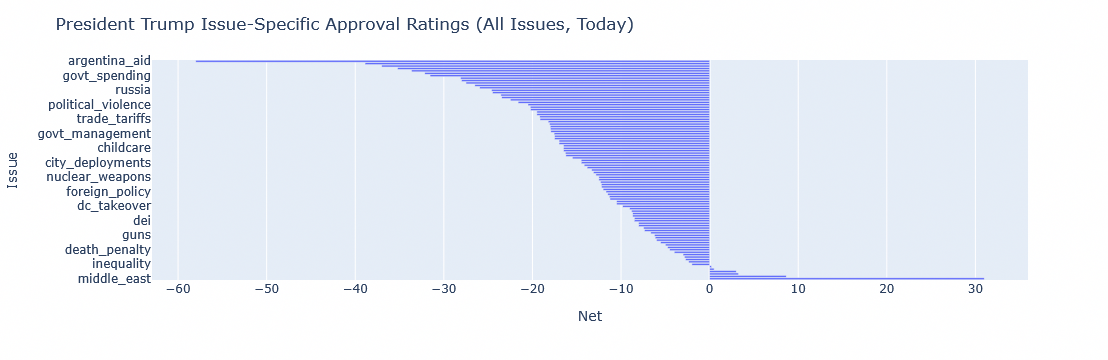

In [84]:
fig = px.bar(all_issues_approval, x='net', y='issue')
fig.update_layout(
    title='President Trump Issue-Specific Approval Ratings (All Issues, Today)',
    xaxis_title='Net',
    yaxis_title='Issue',
    legend_title='Legend',
)
fig.show()

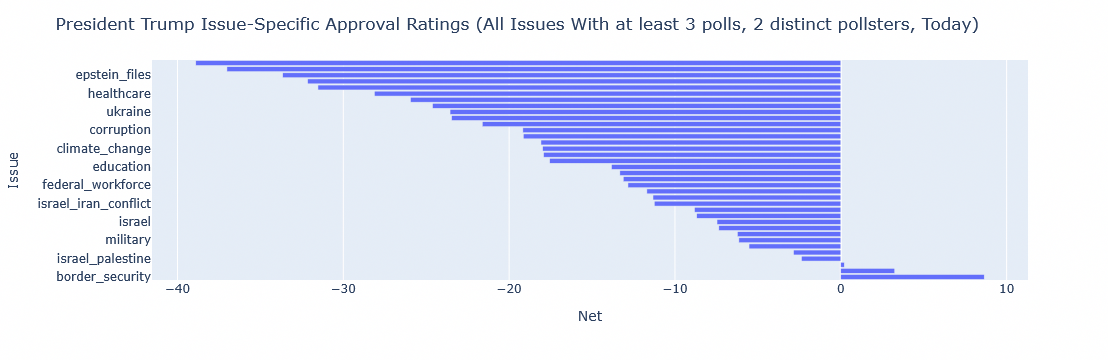

In [85]:
fig = px.bar(all_qual_issues_approval, x='net', y='issue')
fig.update_layout(
    title='President Trump Issue-Specific Approval Ratings (All Issues With at least 3 polls, 2 distinct pollsters, Today)',
    xaxis_title='Net',
    yaxis_title='Issue',
    legend_title='Legend',
)
fig.show()